In [1]:
from tracker import *
import pickle

In [2]:
pname = Path('../talapas/mumax3/dw_collapse/FeGd/coarse.out')
#fnames = sorted(pname.glob('*.ovf'), key=os.path.getmtime)
fnames = sorted(pname.glob('*.ovf'))

In [3]:
fnames

[PosixPath('../talapas/mumax3/dw_collapse/FeGd/coarse.out/m000000.ovf'),
 PosixPath('../talapas/mumax3/dw_collapse/FeGd/coarse.out/m000001.ovf'),
 PosixPath('../talapas/mumax3/dw_collapse/FeGd/coarse.out/m000002.ovf'),
 PosixPath('../talapas/mumax3/dw_collapse/FeGd/coarse.out/m000003.ovf'),
 PosixPath('../talapas/mumax3/dw_collapse/FeGd/coarse.out/m000004.ovf'),
 PosixPath('../talapas/mumax3/dw_collapse/FeGd/coarse.out/m000005.ovf'),
 PosixPath('../talapas/mumax3/dw_collapse/FeGd/coarse.out/m000006.ovf'),
 PosixPath('../talapas/mumax3/dw_collapse/FeGd/coarse.out/m000007.ovf'),
 PosixPath('../talapas/mumax3/dw_collapse/FeGd/coarse.out/m000008.ovf'),
 PosixPath('../talapas/mumax3/dw_collapse/FeGd/coarse.out/m000009.ovf'),
 PosixPath('../talapas/mumax3/dw_collapse/FeGd/coarse.out/m000010.ovf'),
 PosixPath('../talapas/mumax3/dw_collapse/FeGd/coarse.out/m000011.ovf'),
 PosixPath('../talapas/mumax3/dw_collapse/FeGd/coarse.out/m000012.ovf'),
 PosixPath('../talapas/mumax3/dw_collapse/FeGd/coar

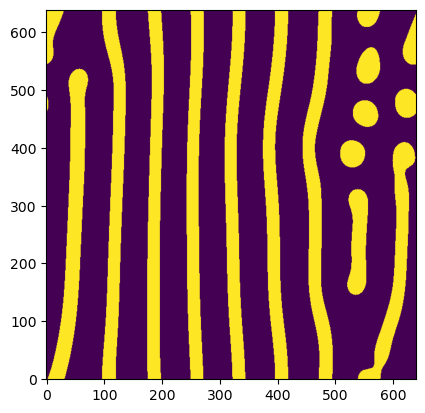

In [6]:
i = 0
layer = 12
thresh = -0.5
data, title = get_data(fnames[i])
data_shape = (data['metadata']['xnodes'],data['metadata']['ynodes'],data['metadata']['znodes'])
mz_layer = data['data']['m_z'][:,:,layer].T
mz_layer_bool = mz_layer > thresh
mz_proj = np.any(data['data']['m_z'] > thresh, axis=2).T
plt.imshow(mz_proj, origin='lower')

In [7]:
image_shape = mz_layer.shape

In [8]:
binary = (255*mz_proj).astype(np.uint8)
_, th = cv.threshold(binary,127,255,0,)
contours, hierarchy = cv.findContours(th, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
print(len(contours))

17


In [9]:
i = 0
layer = 12
data0, _ = get_data(fnames[i])
mx0 = data0['data']['m_x']
my0 = data0['data']['m_y']
mz0 = data0['data']['m_z']
theta0, gamma0 = find_theta_gamma(mx0, my0, mz0, degrees=False)
domains_z0 = process_contours(mz0,layer=layer,image_shape=image_shape,gamma_arr=gamma0,polarity=1)
plot_domains_z(domains_z0,image_shape,color='lime',properties=True)
"""
data1,_ = get_data(fnames[i+1])
mx1 = data1['data']['m_x']
my1 = data1['data']['m_y']
mz1 = data1['data']['m_z']
theta1, gamma1 = find_theta_gamma(mx1, my1, mz1, degrees=False)
domains_z1 = process_contours(mz1,layer=layer,image_shape=image_shape,theta_arr=theta1,gamma_arr=gamma1,polarity=1,return_contours=True)
plot_domains_z(domains_z1,image_shape,color='red')
"""

AttributeError: 'NoneType' object has no attribute 'shape'

In [9]:
output_dir = "/Users/jacques/Documents/Projects/domain_tracker/frames/"
filename = 'test.pkl'

"""
frames = find_domains(fnames, energy=False, debug=False)
with open(output_dir+filename, 'wb') as f:
    pickle.dump(frames, f)
"""

with open(output_dir+filename, 'rb') as f:
    frames = pickle.load(f)

Frame 0 (3.70%)
Finding domains and Bloch lines...
Found 13 domains and 4 Bloch lines
Frame 1 (7.41%)
Finding domains and Bloch lines...
Found 19 domains and 8 Bloch lines
Frame 2 (11.11%)
Finding domains and Bloch lines...
Found 19 domains and 8 Bloch lines
Frame 3 (14.81%)
Finding domains and Bloch lines...
Found 20 domains and 10 Bloch lines
Frame 4 (18.52%)
Finding domains and Bloch lines...
Found 21 domains and 12 Bloch lines
Frame 5 (22.22%)
Finding domains and Bloch lines...
Found 21 domains and 12 Bloch lines
Frame 6 (25.93%)
Finding domains and Bloch lines...
Found 21 domains and 16 Bloch lines
Frame 7 (29.63%)
Finding domains and Bloch lines...
Found 68 domains and 80 Bloch lines
Frame 8 (33.33%)
Finding domains and Bloch lines...
Found 69 domains and 82 Bloch lines
Frame 9 (37.04%)
Finding domains and Bloch lines...
Found 69 domains and 84 Bloch lines
Frame 10 (40.74%)
Finding domains and Bloch lines...
Found 69 domains and 82 Bloch lines
Frame 11 (44.44%)
Finding domains an

"\n\nwith open(output_dir+filename, 'rb') as f:\n    frames = pickle.load(f)\n"

In [32]:
frames[0]['domains'][1]

array([[[ 3.03543305e+00,  3.03834367e+00,  3.04472566e+00, ...,
          5.53636551e-02,  6.68721199e-02,  7.22486973e-02],
        [ 3.03107285e+00,  3.03360677e+00,  3.03920007e+00, ...,
          6.54199123e-02,  7.54821301e-02,  8.01632404e-02],
        [ 3.02638173e+00,  3.02855277e+00,  3.03338742e+00, ...,
          7.57184029e-02,  8.44001770e-02,  8.84160995e-02],
        ...,
        [ 3.04618287e+00,  3.05030274e+00,  3.05922008e+00, ...,
          2.69989967e-02,  4.32276726e-02,  5.08749485e-02],
        [ 3.04302716e+00,  3.04673314e+00,  3.05477643e+00, ...,
          3.61125469e-02,  5.07056713e-02,  5.75647354e-02],
        [ 3.03942990e+00,  3.04273152e+00,  3.04992986e+00, ...,
          4.55820560e-02,  5.86018562e-02,  6.47034645e-02]],

       [[ 3.04143119e+00,  3.04539132e+00,  3.05400777e+00, ...,
          2.96447277e-02,  4.54306602e-02,  5.28793335e-02],
        [ 3.03829598e+00,  3.04185891e+00,  3.04963517e+00, ...,
          3.85346413e-02,  5.27446270e

In [1]:
track_domains_across_frames(frames, reset=True, iou_thresh=0.8, con_thresh=0.8)
with open(output_dir+filename, 'wb') as f:
    pickle.dump(frames, f)

NameError: name 'track_domains_across_frames' is not defined

In [7]:
frames.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [13]:
domain_chronology = generate_domain_chronology(frames)

In [7]:

i = 0
plotter = pv.Plotter(off_screen=False)
# Precompute camera position
camera = pv.Camera()
camera.enable_parallel_projection()
shape = np.array(frames[0]['domains'][0].shape, dtype=np.float32)
focal_point = np.array(shape) / 2
camera.position, camera.focal_point, camera.up = spherical_camera_pos(640, 30, -60, focal_point)
camera.parallel_scale = 300
camera.clipping_range = (0, 3000)
plotter.camera = camera
pyvista_draw_frame(plotter, frames[i]['domains'],frames[i]['gamma'],font='courier',fontsize=8)
plotter.show()


Widget(value='<iframe src="http://localhost:55989/index.html?ui=P_0x176f44e50_3&reconnect=auto" class="pyvista…

In [7]:
#sub_dict = {k: frames[k] for k in range(23) if k in frames}
sub_dict = {k: frames[k] for k in [20] if k in frames}

In [ ]:
output_dir = "/Users/jacques/Documents/Projects/domain_tracker/movies/"
filename = "coarse_frames.mp4"
pyvista_generate_movie(sub_dict, output_dir+filename, 12, 320, 30, -60, window_size=(1080,720))

Progress: 0%


KeyboardInterrupt: 

: 